# 3.09 Numerical methods 1 exam - 14:00-16:00 5th May 2017

# Test instructions

* This test contains **3** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You should write an explanation of your solution as comments in your code.
* In each case your solution program must fulfil all of the instructions. Please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman) at <mailto:g.gorman@imperial.ac.uk> **and also** [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott) at 
<mailto:m.d.piggott@imperial.ac.uk>  

## Question 1

Consider the matrix:

\begin{equation}
\bf{A} = 
\begin{pmatrix}
1  & 3 & −9 &  6 & 4\\
2  &−1 &  6 &  7 & 1\\
3  & 2 & −3 & 15 & 5\\
8  &−1 &  1 &  4 & 2\\
11 & 1 & −2 & 18 & 7
\end{pmatrix}.
\end{equation}

 1. Write a Python Gaussian function that takes as input a matrix and returns the upper diagonal matrix. Demonstrate the correctness by applying it to the matrix A. <sub>[17 marks]</sub>
 2. Determine whether $\bf{A}$ is invertible and explain why. <sub>[17 marks]</sub>

In [1]:
import numpy as np
from scipy import linalg

A = np.array([[1,  3, -9,  6, 4],
                 [2, -1,  6,  7, 1],
                 [3,  2, -3, 15, 5],
                 [8, -1,  1,  4, 2],
                 [11, 1, -2, 18, 7]], dtype=np.float64) # defining dtype is an alternative to putting . by hand after the numbers


def swap_rows(A, i, j) :
    tmp_row = A[i].copy()
    A[i] = A[j]
    A[j] = tmp_row
    
# Let's compute U using gaussian elimination
def upper_triangle(A) :
    
    # Check dimension of the matrix
    n,m = A.shape
    if n != m :
        print("Error: A must be a square matrix, has dimension: %dx%d" % (n,m))
        exit
        
    # Copy the matrix to avoid modifying it
    A = A.copy()
        
    for k in range(n-1): # k is the pivot row index
        
        # Need to select best pivot to avoid dividing by 0
        best_pivot_row = np.argmax(abs(A[k:,k]))
        best_pivot_row += k # offset by k because the 1st row of the slice is the kth row of the matrix
        if best_pivot_row > k :
            swap_rows(A, k, best_pivot_row)
        
        # Update each row below the pivot row
        for i in range(k+1,n) :
            A[i, k:] -= A[i,k]/A[k,k] * A[k,k:]
            
    return A
    
# Call our function and print upper diagonal matrix        
T = upper_triangle(A)
print("Upper diagonal matrix:\n", T)

# Check against linalg function
print("This is similar to linalg:", np.allclose(linalg.lu(A)[2], T))

detA = linalg.det(A)

# A very small value for the determinant indicates this is a near singular matrix.
# We can check if it is close to zero:
print("Is the matrix singular - i.e. cannot be inverted? ", np.isclose(detA, 0))

Upper diagonal matrix:
 [[  1.10000000e+01   1.00000000e+00  -2.00000000e+00   1.80000000e+01
    7.00000000e+00]
 [  0.00000000e+00   2.90909091e+00  -8.81818182e+00   4.36363636e+00
    3.36363636e+00]
 [  0.00000000e+00   0.00000000e+00   2.78125000e+00   7.50000000e+00
    1.09375000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.00000000e+00
    6.66133815e-16]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.33066907e-16]]
This is similar to linalg: True
Is the matrix singular - i.e. cannot be inverted?  True


## Question 2

Consider the expression
\begin{equation}
f(x) = x \mathrm{sin}(\pi x)-\mathrm{e}^{-x}.
\end{equation}

 1. Write a function, $f$,  to evaluate this expression for a given $x$. Show that it works by plotting the function with respect to $100$ evenly spaced points between $x=-3$ and $x=3$. <sub>[8 marks]</sub>
 2. Write another function, $g$ that uses central finite differences to numerically evaluate the derivative of an arbitrary given function with respect to $x$ (you may assume $dx\approx0.01$). Show that it works by plotting the derivative of the function defined above between $x=-3$ and $x=3$. <sub>[8 marks]</sub>
 3. Write a function that implements Newton's method for root finding. It should take as input parameters a function, $f$, whose root is to be found, its derivative function, $g$, and an initial guess, $x0$. <sub>[9 marks]</sub>
 4. Use your implementation of Newton's method to calculate all the roots of $f$ between $-3$ and $3$.<sub>[8 marks]</sub>

Populating the interactive namespace from numpy and matplotlib
There are 100 evenly spaced points in x


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


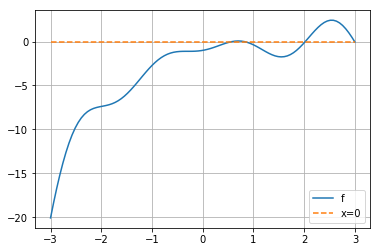

In [2]:
%pylab inline

# 1.1
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x = np.linspace(-3, 3, 100)

print("There are %d evenly spaced points in x" % x.shape[0])

y = f(x)

plot(x, y)
plot(x, np.zeros_like(x), '--') # you can already see there are 4 roots
grid(True)
legend(("f", "x=0"), loc='best')
show()

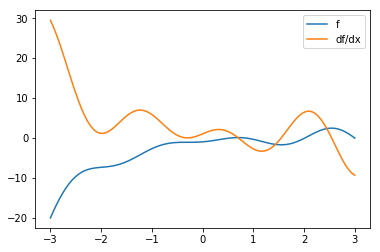

In [3]:
# 1.2
def g(f, x, dx=0.01):
    return (f(x+dx)-f(x-dx))/(2*dx)

plot(x, y)
plot(x, g(f, x))
legend(("f", "df/dx"))
show()


In [4]:
# 1.3
def newton_numdif(f, g, x0, atol=1.0e-4, max_its=1000):
    for i in range(max_its):
        dfdx = g(f, x0)
        
        if np.isclose(dfdx, 0):
            return None
        
        x1 = x0 - f(x0)/dfdx
        
        if abs(x0-x1) < atol:
            return x1
        else:
            x0 = x1
        
    return None

In [5]:
# 1.4

import decimal

r = []
for xi in np.linspace(-3, 3, 100):
    root = newton_numdif(f, g, xi, atol=1.e-12)
    if root is None:
        print("Found zero derivative at x=%f"%xi)
    else:
        root = round(root, 6)
        if -3 <= root <= 3:
            if root not in r :
                r.append(root)
        
print("The %d roots are: " % len(r), r)

The 4 roots are:  [0.57826299999999997, 2.0208910000000002, 0.81911800000000001, 2.9946799999999998]


## Question 3

The discrete function $y$ is defined as:

y = [0.0109439010693,0.292339081461,0.925277149533,
     2.01332091034,3.37454077451,4.68171817154,
     5.64468727334,6.14851510939,6.28859790888,
     6.2961542923,6.4,6.69882629738,7.11010256048,
     7.42182227368,7.42089923772,7.03212055883,
     6.39346348534,5.82192391325,5.67641305593,
     6.17668765765,7.26466471676]

for positions $x$:

x = [-2.0,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,
     0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

     
 1. Fit a polynomial to the data such that the polynomial passes through each point. Plot the polynomial fit with the original data.<sub>[11 marks]</sub>
 2.  Write a Python function that integrates a given function using Simpson's rule. The function should look like *simpson_rule(start_point, end_point, f, atol=1.0e-6)* where *start_point* and *end_point* are the bound of the integral, *f* is the function to be integrated and *atol* is the target error in the integral (you may approximate the error as the amount the integral changes when the number of segments is doubled).<sub>[11 marks]</sub>
 3. Plot the value of the integral as a function of bin width.<sub>[11 marks]</sub>

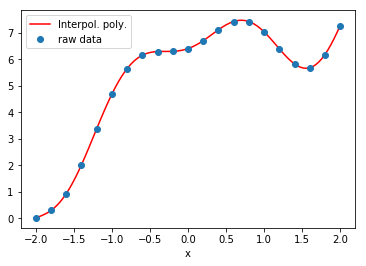

In [6]:
x = [-2.0,-1.8,-1.6,-1.4,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,
     0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
y = [0.0109439010693,0.292339081461,0.925277149533,
     2.01332091034,3.37454077451,4.68171817154,
     5.64468727334,6.14851510939,6.28859790888,
     6.2961542923,6.4,6.69882629738,7.11010256048,
     7.42182227368,7.42089923772,7.03212055883,
     6.39346348534,5.82192391325,5.67641305593,
     6.17668765765,7.26466471676]

poly_coeffs=numpy.polyfit(x, y, len(x)-1)
pn = numpy.poly1d(poly_coeffs)

plot(np.linspace(-2, 2, 100),
         pn(np.linspace(-2, 2, 100)),
         'r', label='pn')
plot(x, y, 'o')
xlabel("x")
legend(("Interpol. poly.", "raw data"), loc='best')
show()

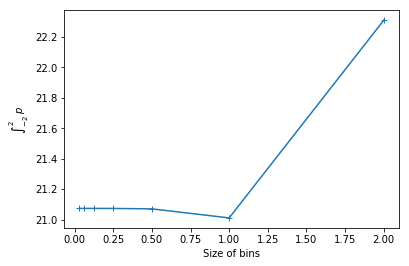

In [7]:
from math import *


def simpsons_rule(start_point, end_point, function, atol=1.e-6, maxiter=1000):
    
    number_of_bins = 2
    previous_total = 0
    convergence = []
    bin_sizes = []
    
    # Loop over the number of bins: start with two, and double it at each iteration
    # set a maximum number of iterations in case the algorithm converges
    for ite in range(maxiter):
        
        bin_size = float(end_point - start_point)/number_of_bins    
        running_total = 0.0
    
        #Loop to create each shape 
        for i in range(number_of_bins):
            #Find a, c, and b
            this_bin_start = start_point + bin_size * (i)
            this_bin_mid = this_bin_start + bin_size/2
            this_bin_end = this_bin_start + bin_size
            #Calculate the rule and add to running total.
            running_total += (bin_size/6)*float(function(this_bin_start)+4*function(this_bin_mid)+function(this_bin_end))
        
        convergence.append(running_total)
        bin_sizes.append(bin_size)
        
        # the error is approximated by the amount the integral changes when the number of segments is doubled
        error = abs(previous_total - running_total)
        
        # Stop if the error is < the tolerance, i.e. when the algorithm has converged
        if error < atol:
            return running_total, error, convergence, bin_sizes
        
        # the question suggests to double the number of bins
        number_of_bins = number_of_bins*2
        previous_total = running_total
        
    print("ERROR: Simpson's method did not converge")
    return running_total, error, convergence, bin_sizes



integral, error, convergence, bin_sizes = simpsons_rule(-2, 2, pn)


plot(bin_sizes, convergence, '+-')
xlabel("Size of bins")
ylabel("$\int_{-2}^2 \ p$")
show()
